In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from abc import ABC, abstractmethod
import numpy as np


In [2]:
class Tree:
    
    def __init__(self, root):
        self.root = root
        self.labels = []
        root.setTree(self)
        self.generate(root)

    @abstractmethod
    def generate(self, node):
        pass
    
    def addLabel(self, label: int):
        self.labels.append(label)

class Node:
    TEAL = "#008080"
    GOLD = "#ffd700"
    PURPLE = "#800080"

    colors = [TEAL, GOLD, PURPLE]
    
    columns = []

    predecessor_con = []
    successor_con = []
    connection_id = 0

    def __init__(self, label):
        self.tree = None
        self.predecessor = None
        self.successors = [] 
        self.label = label
        self.col = 0
        self.row = 0

    def addSuccessor(self, successor):
        successor.row = self.row + 1
        if self.tree is not None and not successor.label in self.tree.labels:
            successor.setTree(self.tree)
            successor.predecessor = self
            self.successors.append(successor)
    
    def setTree(self, tree: Tree):
        self.tree = tree
        self.tree.addLabel(self.label)

    def getType(label):
        if (label + 1) % 3 == 0:
            return 1
        elif label % 3 == 0:
            return 2
        elif (label - 1) % 3 == 0:
            return 3
        return -1


#    def setPosition(self, position):
#        self.pos = position

#        return

    def setPosition(self):
        #position


        col_counter = 0
        len_col_i = 0
        len_columns = len(Node.columns)
        col = 0
        row = 0

        for i in range(0,len_columns):
            len_col_i = len(Node.columns[i])
            #col_counter = i
            for j in range(0, len_col_i):
                
                if Node.columns[i][j] == int(self.label):
                    col = i+1

        if self.label == 1:
            row = 1
        elif self.label == 3:
            row = 2
        else:
            for i in range(1,int(self.label)):
                if self.label > (2**(i-1)) and self.label < (2**i - 1):
                    row = i+1
                    break

        #position = [row, col]

        self.col = col
        self.row = row
        #node.setPosition(col_counter)

        return-1

    





class DataFrameGenerator:
    @staticmethod
    def generateGraphData(node : Node, horizontal_flip = False, predecessor_successor_array = []) -> list:
        successors = node.successors[::-1] if horizontal_flip else node.successors
        for successor in successors:
            predecessor_successor_array.append([node.label, successor.label])
            DataFrameGenerator.generateGraphData(successor, horizontal_flip, predecessor_successor_array)
        return predecessor_successor_array

    @staticmethod
    def generateDataFrame(node : Node, horizontal_flip = False) -> pd.DataFrame: 
        columns = ['predecessorId', 'successorId']
        df = pd.DataFrame(columns = columns, data=DataFrameGenerator.generateGraphData(node, horizontal_flip, []))
        df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
        df[['predecessorId', 'successorId']] = df[['predecessorId', 'successorId']].astype('int')
        return df

##############################






In [3]:
#Aberkane Tree
class AberkaneTree(Tree):
    def __init__(self, root: Node, height: int):
        self.height = height  
        #self.node_count 
        super().__init__(root)   


    def generate(self, node: Node):
        
#        if node.row == 0:
#            middle_child = Node(node.label * 2 + 1)
#            node.addSuccessor(middle_child)
#            self.generate(middle_child)
##            middle_child.setPosition()
#
#        elif node.row < self.height:
#           
#            middle_child = Node(node.label * 4 + 1)
#            right_child = Node(node.label * 2 + 1)
#            left_child = Node(node.label * 2 - 1)
#
#            node.addSuccessor(right_child)
#            node.addSuccessor(middle_child)
#            node.addSuccessor(left_child)###
#
#            self.generate(right_child)
#            self.generate(middle_child)
#            self.generate(left_child)
            #node.setPosition()

        mid_in_range = True
        left_in_range = True
        right_in_range = True

        label = node.label
        h = self.height
        b_leaf = 1
        for i in range(1,h+1):
            b_leaf = int(b_leaf * 2 + 1) 

        if (node.label * 4 + 1) > (b_leaf):
            mid_in_range = False
        else:
            mid_in_range = True

        if (node.label * 2 + 1) > (b_leaf):
            right_in_range = False
        else:
            right_in_range = True

        if (node.label * 2 - 1) > (b_leaf):
            left_in_range = False
        else:
            left_in_range = True
        




        if node.label == 1:
            
            right_child =  Node(node.label * 2 + 1)
#            middle_child = Node(node.label * 4 + 1)
            
            
            node.addSuccessor(right_child)
#            node.addSuccessor(middle_child)
            
            
            self.generate(right_child)
#            self.generate(middle_child)
            if self.height < 2:
                Node.predecessor_con.append(int(node.label))
                Node.successor_con.append(int(right_child.label)) 
                Node.predecessor_con.append(int(node.label))
                Node.successor_con.append(int(5)) 
                Node.connection_id = Node.connection_id + 2
            
            #middle_child.setPosition() 

 #       elif node.label == 3

        else:
            
            if mid_in_range == True:
                middle_child = Node(node.label * 4 + 1)          
            if right_in_range == True:
                right_child = Node(node.label * 2 + 1)
            if left_in_range == True:
                left_child = Node(node.label * 2 - 1)

            if right_in_range == True:
                node.addSuccessor(right_child)
            if mid_in_range == True:
                node.addSuccessor(middle_child)
            if left_in_range == True:
                node.addSuccessor(left_child)

            if right_in_range == True:
                self.generate(right_child)
                Node.predecessor_con.append(node.label)
                Node.successor_con.append(right_child.label)
                Node.connection_id = Node.connection_id + 1
            if mid_in_range == True:
                self.generate(middle_child)
                Node.predecessor_con.append(node.label)
                Node.successor_con.append(middle_child.label)
                Node.connection_id = Node.connection_id + 1
            if left_in_range == True:
                self.generate(left_child)



















        node.setPosition()
    
    def genColCluster(tree_height):
        
        aberkane_height = tree_height

        col_arr = []
        big_leaf = int(1)
        used_nodes = []
        col_position = 0
        is_right = False
        is_left = False
        right_node = 0
        left_node = 0

        for i in range(1,aberkane_height+1):
            big_leaf = int(big_leaf * 2 + 1) 

        for j in range(1,big_leaf+1, 2):
            is_part = False
            col_build = []

            for x in used_nodes:
                if j == x:
                    is_part = True
            
            if is_part == False:
                used_nodes.append(int(j))
                col_build.append(int(j))

                right_node = int((j-1)/2)
                left_node = int((j+1)/2)
                    
                is_right = False
                is_left = False

                for a in used_nodes:      
                    if j == 1:
                        is_right = True
                        is_left = True
                    elif a == int(right_node):
                        is_right = True
                    elif a == int(left_node):
                        is_left = True
                            
                test_node = j*4+1
                while(test_node < big_leaf):
                    test_node_is_part = False

                    for y in used_nodes:
                        if test_node == y:
                            test_node_is_part = True
                            test_node = big_leaf+1
                    
                    if test_node_is_part == False:

                        col_build.append(int(test_node))
                        used_nodes.append(int(test_node))
                        test_node = test_node * 4 + 1

                col_position
                len_col_i = 0
                len_columns = len(col_arr)

                for i in range(0,len_columns):
                    len_col_i = len(col_arr[i])
                    #col_counter = col_counter + 1
                    for j in range(0, len_col_i):
                    
                        if col_arr[i][j] == left_node or col_arr[i][j] == right_node:
                            col_position = i 

                if is_left == True and is_right == True:
                    col_arr.append(col_build)
                elif is_left == True:
                    if col_position == 0:
                        col_arr.insert(col_position, col_build)
                    else:
                        col_arr.insert(col_position, col_build)
                elif is_right == True:
                    col_arr.insert(col_position+1, col_build)

        Node.columns = col_arr
        return
##############################################################

aberkane_height = 5

AberkaneTree.genColCluster(aberkane_height-1)
root = Node(1)
#root.setColPosition()
aberkane_tree = AberkaneTree(root, aberkane_height-1)
print(root.columns)
print(root.col)




        
        

[[17], [9], [19], [1, 5, 21], [11], [23], [25], [3, 13], [27], [7, 29], [15], [31]]
4


In [4]:
def func_V(n):
    return 4 * n + 1

def func_S(n):
    return 2 * n + 1

def func_G(n):
    return 2 * n - 1

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


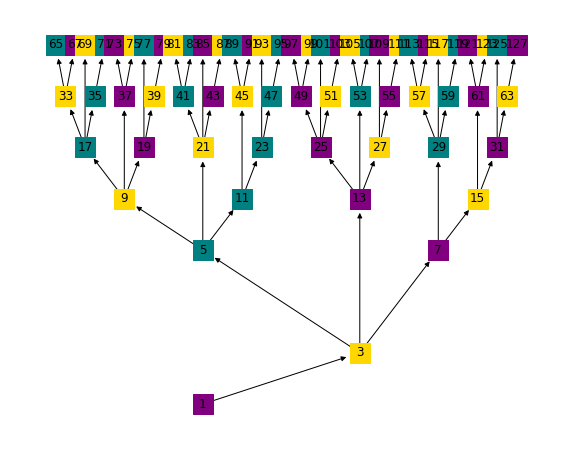

In [5]:

aberkane_height = 7

AberkaneTree.genColCluster(aberkane_height-1)
root = Node(1)
#root.setColPosition()
aberkane_tree = AberkaneTree(root, aberkane_height-1)
#print(root.columns)

#for i in aberkane_tree:
#root.setPosition()    

print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
#print(Node.columns)
#print(root.col)
#print(root.row)
#aberkane_tree.col_cluster = aberkane_tree.setColumnCluster

df = DataFrameGenerator.generateDataFrame(aberkane_tree.root, True)
#print(df)
G = nx.from_pandas_edgelist(df, 'predecessorId', 'successorId', create_using=nx.DiGraph)
node_colors = []
for node in G:
    color_type = Node.getType(node)
    node_colors.append(Node.colors[color_type-1])

###########################
def generatePosArr(label_value):
    #result = []
    
    col_counter = 0
    len_col_i = 0
    len_columns = len(Node.columns)
    col = 0.0
    row = 0.0

    for i in range(0,len_columns):
        len_col_i = len(Node.columns[i])
        #col_counter = i
        for j in range(0, len_col_i):
            
            if Node.columns[i][j] == int(label_value):
                col = float(i+1)
                break

    if label_value == 1:
        row = -1*float(1)
    elif label_value == 3:
        row = -1*float(2)
    
    else:
        for i in range(2,int(label_value)):
            if label_value > (2**(i-1)) and label_value < (2**i):
                row = -1*float(i+1)
                break

    #position = [row, col]
    
    result = (col,row)
    #result_string = "(" + str(row) + "," + str(col) + ")"
    #result = result_string

    return result

#def generateDF():
#    columns_df = ['predecessor', 'successor']
#    #df1 = {}
#    result = pd.DataFrame(columns=columns_df)#
#
#    for i in range (0, Node.connection_id):
#        result.append([predecessorId: Node.predecessor_con[i], 'successorId: Node.successor_con[i]])

#    return result


pos1 = {}
len_col_i = 0
len_columns = len(Node.columns)

for i in range(0,len_columns):
    len_col_i = len(Node.columns[i])
    #col_counter = col_counter + 1
    for j in range(0, len_col_i):
        pos1[Node.columns[i][j]] = generatePosArr(Node.columns[i][j])

# dictionary        
#print(pos1)
pos2 = {1: '(1.0,2.0)', 3: '(2.0,4.0)', 5: '(4.0,2.0)', 9: '(5.0,1.0)',   11: '(5.0,3.0)', 13: '(5.0,4.0)', 7: '(4.0,5.0)', 15: '(5.0,6.0)'}
#print(pos1)
#{1: (135.0, 234.0), 3: (135.0, 162.0), 5: (63.0, 90.0), 9: (27.0, 18.0), 11: (99.0, 18.0), 13: (135.0, 90.0), 7: (207.0, 90.0), 15: (207.0, 18.0)} -> generated by graphviz
pos3 = {1: (135.0, 234.0), 3: (135.0, 162.0), 5: (63.0, 90.0), 9: (27.0, 18.0), 11: (99.0, 18.0), 13: (135.0, 90.0), 7: (207.0, 90.0), 15: (207.0, 18.0)}

#test5 = generateDF()
#print(test5)

pos = graphviz_layout(G, prog="dot", root=1, args='-Gsplines=true -Gsep=1 -Goverlap=false -Gorientation=10')
#print(pos)
#print(pos3)
plt.figure(figsize=(10, 8))
plt.gca().invert_yaxis()
#nx.draw(G, pos=pos, with_labels=True,  node_shape="s", node_size=400, linewidths=10)
nx.draw(G, node_color=node_colors, pos=pos1, with_labels=True,  node_shape="s", node_size=400, linewidths=1, ) # pos=pos --> immer die gleichen variablen davor und dahinter

